<div class="alert alert-block alert-info">
    <h1>pandas and DataFrames</h1>
    <p>Pandas DataFrames are easy-to-query table-like structures consisting of rows and columns. Pandas Data Frames can be created by loading the data from the external, existing storage like a SQL database or CSV files. But they can also be created from Python lists, tuples, and dictionaries.</p>
 </div>

In [1]:
# Assuming that you have now the pandas module installed on your machines, import it into Jupyter Notebook.

import pandas as pd


In [2]:
# Let's repeatedly create the same 2-d array that we worked with in Part 1 Numpy And Arrays of this class.

myNewArray = [[4, 8, 12, 16, 20, 2, 50], [5, 7, 30, 4, 1, 15, 100]]
myNewArray

# Note this is a nested Python list that serves as an array.
# But we can convert it into a Numpy nd array as we did it in Part 1.
# This time, we'll convert it into a pandas DataFrame.

[[4, 8, 12, 16, 20, 2, 50], [5, 7, 30, 4, 1, 15, 100]]

In [3]:
# convert the 2-d array into a data frame with the pandas method DataFrame() and store it in the variable 'DF'

DF = pd.DataFrame(myNewArray)
DF

# Note that JN formats dataframes, as below, to make them more legible.
# Other Python environments do not support this formating feature.
# Note that the output displays index positions of each element instead of the names of columns and rows.

,0,1,2,3,4,5,6
0,4,8,12,16,20,2,50
1,5,7,30,4,1,15,100


In [4]:
# Python dictionaries are useful to manipulate pandas' dataframes, e.g. rename the columns

DF2 = DF.rename(columns={0 :'Jan', 1:'Feb', 2:'Mar', 3:'Apr', 4:'May', 5:'Jun', 6:'Jul'})
DF2

,Jan,Feb,Mar,Apr,May,Jun,Jul
0,4,8,12,16,20,2,50
1,5,7,30,4,1,15,100


In [5]:
# You can rename index positions with the help of dictionary structures as well 

DF2 = DF2.rename(index={0: "One", 1: "Two"})
DF2

,Jan,Feb,Mar,Apr,May,Jun,Jul
One,4,8,12,16,20,2,50
Two,5,7,30,4,1,15,100


In [6]:
# Let's hand-code a new dataframe from a Python dictionary.
# The dictionary takes strings (names of people) as unique keys and lists with numbers for multiple values.


DF3 = pd.DataFrame({'Tom': [11, 21, 31],
                   'Chenlu': [12, 22, 32],
                   'Avni': [13, 23, 33]}
                  )

DF3

,Tom,Chenlu,Avni
0,11,12,13
1,21,22,23
2,31,32,33


In [7]:
# The major Python visualization library is matplotlib.

# You need to install matplotlib first on your machines with the 'pip install matplotlib' command in Python shell.

# Then import its sub-library .pyplot under alias 'plt' into the working environment of JN.

import matplotlib.pyplot as plt


# Declare the magic line to display plots inline.

%matplotlib inline

In [8]:
# Let's hand-code a small dataset and store it in the Votes variable. 
# Note we are using the dictionary as an argument to create two columns of data.

Votes = pd.DataFrame({'name':['Obama', 'Trump', 'HClinton', 'TCruz'], 'vote':[35,25,20,20]})

Votes

,name,vote
0,Obama,35
1,Trump,25
2,HClinton,20
3,TCruz,20


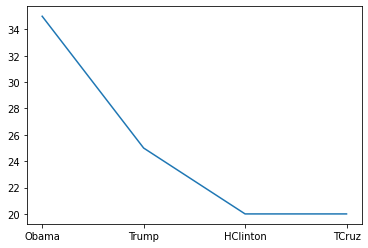

In [9]:
# we can call .plot() on a DataFrame object, which in our case is stored in the "Votes" variable
# when we do so, the matplotlib library creates the plot under the hood.

# Let's treat the numeric values in the "vote" column as raw frequencies and create a line plot

plt.plot(Votes["name"],Votes["vote"])

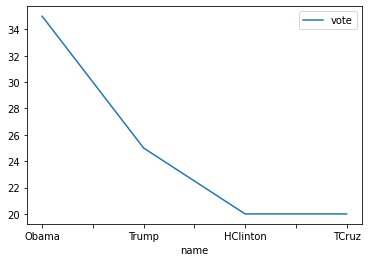

In [10]:
# you can achieve the same as above by using the DataFrame object’s .plot() method:

Votes.plot(x="name", y="vote")

# plot() is a wrapper for the pyplot. plot() method

<BarContainer object of 4 artists>

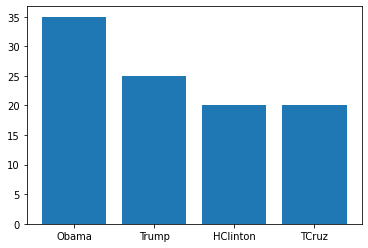

In [11]:
# For this type of data, it makes more sense to represent our dataset as a bar plot or a pie chart
# Once again let's call plot() on the 'Votes' object

plt.bar(Votes["name"], Votes["vote"])

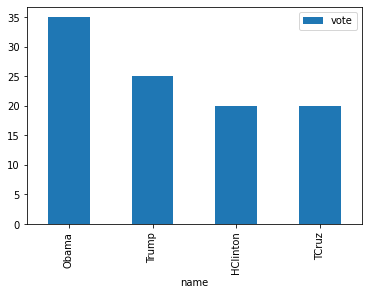

In [12]:
# Or alternatively, we can use the 'Votes' object's .plot() method

# By default, this method produces a line chart as above
# But if you want a bar plot, pass the keyword argument 'kind' set to the value 'bar'

Votes.plot(kind='bar', x="name", y="vote")

Text(0.5, 1.0, 'Vote shares')

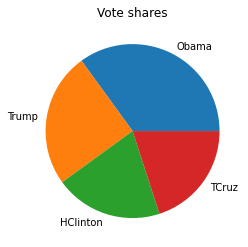

In [13]:
# Let's treat the numeric values in the 'vote' column as shares this time to create a pie visual.

# plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 

fig, ax = plt.subplots() # A figure can be understood as a canvas where we paint our visual
# Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. 
# To have the returned figure object is useful but not obligatory
# It's useful if you want to change figure-level attributes or save the figure as an image file later 

ax.pie(Votes['vote'], labels=Votes['name']) 
# 1st argument plots the numbers from the 'Votes' object's column called 'vote', 
# while 2nd argument takes the string values from the 'name' column as labels for each pie slice

plt.title('Vote shares') # add the title to your visual

#plt.show() #is not necessary in JN, but you may need this statement in other Python environments

([<matplotlib.patches.Wedge at 0x1c5e1ffa940>,
 [Text(0.5447886197087486, 1.0692078188246832, 'Obama'),
  Text(-1.086457168210212, 0.17207795223283895, 'Trump'),
  Text(-0.33991872319707345, -1.046162158377023, 'HClinton'),
  Text(0.8899186877588748, -0.646563785853741, 'TCruz')],
 [Text(0.31779336149676995, 0.6237045609810652, '35.0%'),
  Text(-0.5926130008419338, 0.09386070121791214, '25.0%'),
  Text(-0.18541021265294913, -0.5706339045692852, '20.0%'),
  Text(0.4854101933230226, -0.3526711559202223, '20.0%')])

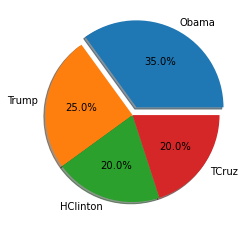

In [14]:
# Let's annotate our pie visual to render it more informative and legible

explode = (0.1, 0, 0, 0)  # only "explode" the 1st slice that represents data in index position 0 in the data frame

fig, ax = plt.subplots()
ax.pie(Votes['vote'], labels=Votes['name'], explode=explode, autopct='%1.1f%%', shadow=True)
 
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

In [15]:
# We can save the visual as an external jpg, png or pdf file
# Make sure you give your new image file a name and specify its extension

fig.savefig("VotePie.jpg")

# After you have executed this code cell, check your JN directory where the jpg image must have been saved.